# Karcher Mean & tPCA

Using the library [fdasrsf](https://fdasrsf-python.readthedocs.io/en/latest/), we compute the Karcher mean of a group of curves, whilst simultaneously outputting the tangent PCA results too. 

Note that the open or closed status of the curves can be inputted by using the _open_closed_ parameter in the _align_ function e.g. ``open_closed="C"``.

Also note that the number of outputted principal components can be chosen with the _PC_ parameter in _align_ e.g. ``PC=5``.

#### Imports

In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy
import os
import matplotlib.pyplot as plt
from tPCA_KarcherMean import align
from tPCA_KarcherMean import formatData
from tPCA_KarcherMean import rescale
import re

### Load Data

In [5]:
df = pd.read_csv("C:\\Users\\arian\\Documents\\GitHub\\contourExtraction\\smoothedMussels_Scaled_251.csv")
all_groups = np.unique(list(df['Group']))

### Karcher Mean and tPCA

Default output is an array containing the aligned curves, a Pandas dataframe containing the Karcher mean and a pandas dataframe containing the tPCA results. If you wish to output _all_ items as an array, instead of a dataframe, then set the _returnDF_ parameter to 0.

The default number of principal components is 3. You can change this by adjusting the _PC_ paramter e.g. write _align(beta,PC=4)_.

In [ ]:
for group in all_groups:
    # Filter dataset for group:
    newdf = df[df['Group'].isin([group])]
    names = list(np.unique(newdf['Name']))
    beta = formatData(newdf)
    # Compute Karcher mean / tPCA:
    algn,km,tpca = align(beta,returnDF=1)
    # Save results:
    tpca.index=names
    tpca.index.name='Filename'
    newname = "_".join(re.findall('\w+',group))
    tpca.to_csv('tPCA_'+newname+'.csv')
    km.to_csv('KarcherMean_'+newname+'.csv',index=False)

Computing Karcher Mean of 53 curves in SRVF space..
updating step: 1


### Save CSVs

In [19]:
tpca.index=list(np.unique(df['Name']))
tpca.index.name='Filename'

tpca.to_csv('tPCA_Results2.csv')
km.to_csv('KarcherMean_Results2.csv',index=False)

### Plot Example

In [5]:
xkm,ykm = rescale(list(km['KM_X']),list(km['KM_Y']))

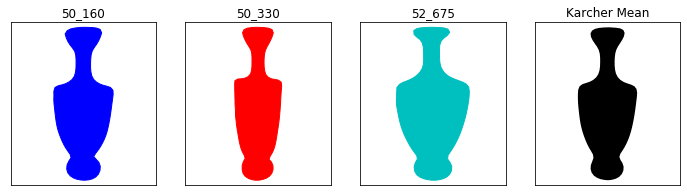

In [6]:
fig,ax = plt.subplots(1,4,figsize=(12,3))

names = np.unique(list(df['Name']))

cols = ['b','r','c']
for p,nm in enumerate(names):
    x = list(df[df['Name']==nm]['X'])
    y = list(df[df['Name']==nm]['Y'])
    ax[p].fill(x,y,'-',color=cols[p])
    ax[p].set_title(nm)

ax[3].fill(xkm,ykm,'-k')
ax[3].set_title('Karcher Mean')

for i in range(0,4):
    ax[i].set_xlim([-1.6,1.6])
    ax[i].set_ylim([-1.6,1.6])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
